# 다중클래스분류_callback사용해_과적합_막고_최고성능모델_저장하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_metplotlib

ModuleNotFoundError: No module named 'koreanize_metplotlib'

In [2]:
data = pd.read_csv("./data/winequality-white.csv", sep=";")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


<Axes: >

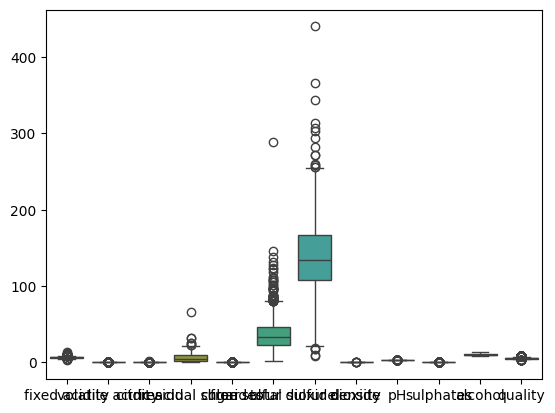

In [5]:
sns.boxplot(data)

In [6]:
data['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [25]:
X = data.drop('quality', axis=1)
y = data['quality']

수치가 안나오는 것은 데이터가 너무 불균등해서

# 데이터 증폭 후 분석
* 데이터 증폭 + 스케일러 사용시
* 데이터 증폭을 먼저 하고 스케일러로 스케일링

In [20]:
from imblearn.over_sampling import SMOTE

In [35]:
X_train, X_valid, y_train, y_valid = train_test_split(X ,y, test_size=0.4, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test =  train_test_split(X_valid ,y_valid, test_size=0.4, stratify=y_valid, random_state=42)

In [36]:
smt = SMOTE(k_neighbors=2, random_state=42)
smt_X_train, smt_y_train = smt.fit_resample(X_train, y_train)
smt_X_train = pd.DataFrame(smt_X_train, columns=X_train.columns)
smt_y_train = pd.Series(smt_y_train)

/home/jihyun/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [37]:
smt_X_train 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.800000,0.210000,0.270000,2.100000,0.030000,26.000000,139.000000,0.990000,3.160000,0.610000,12.600000
1,6.700000,0.240000,0.320000,10.300000,0.079000,37.000000,122.000000,0.996620,3.020000,0.450000,8.800000
2,7.600000,0.270000,0.420000,2.600000,0.044000,29.000000,110.000000,0.991200,3.310000,0.510000,12.700000
3,7.000000,0.150000,0.280000,14.700000,0.051000,29.000000,149.000000,0.997920,2.960000,0.390000,9.000000
4,7.500000,0.170000,0.340000,1.400000,0.035000,13.000000,102.000000,0.991800,3.050000,0.740000,11.000000
...,...,...,...,...,...,...,...,...,...,...,...
9221,7.390043,0.240664,0.364315,2.006638,0.031033,27.132757,138.137077,0.990542,3.282987,0.478009,12.513276
9222,6.751973,0.329605,0.350789,1.782368,0.024343,26.127625,93.510499,0.989848,3.397842,0.552250,12.551973
9223,6.773419,0.325316,0.359367,1.808102,0.024815,26.427860,94.711442,0.989875,3.396127,0.544101,12.573419
9224,6.630848,0.353830,0.302339,1.637017,0.021679,24.431866,86.727465,0.989690,3.407532,0.598278,12.430848


In [38]:
smt_y_train.value_counts()

quality
7    1318
5    1318
6    1318
4    1318
8    1318
3    1318
9    1318
Name: count, dtype: int64

In [54]:
smt_y_train = pd.get_dummies(smt_y_train)
smt_y_train

,3,4,5,6,7,8,9
0,False,False,False,False,True,False,False
1,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...
9221,False,False,False,False,False,False,True
9222,False,False,False,False,False,False,True
9223,False,False,False,False,False,False,True
9224,False,False,False,False,False,False,True


In [61]:
rs = RobustScaler()
train_temp = rs.fit_transform(smt_X_train)
valid_temp = rs.fit_transform(X_valid)
test_temp =  rs.fit_transform(X_test)
rs_X_train = pd.DataFrame(train_temp, columns= smt_X_train.columns, index= smt_X_train.index)
rs_X_valid = pd.DataFrame(X_valid, columns= X_valid.columns, index= X_valid.index)
rs_X_test = pd.DataFrame(X_test, columns= X_test.columns, index= X_test.index)

In [62]:
y_test

2084    6
3795    6
2736    6
2320    6
4637    6
       ..
2402    6
2134    6
3569    6
4714    7
3385    6
Name: quality, Length: 784, dtype: int64

In [63]:
smt_y_train.shape[1]

7

In [64]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [52]:

model = Sequential()
model.add(Input(shape=(smt_X_train.shape[1], )))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(smt_y_train.shape[1], activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,495 (13.65 KB)

 Trainable params: 3,495 (13.65 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
import os

In [66]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import matplotlib.pyplot as plt

# 모델 컴파일
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# 콜백 설정
early_stop = EarlyStopping(patience=50)

# 모델 저장 디렉토리 생성
os.makedirs("./model", exist_ok=True)

# 파일 저장 포맷
filepath = "./model/whitewine_loss:{val_loss:.4f}__{epoch:04d}.keras"  

# 체크포인트 콜백
model_save = ModelCheckpoint(filepath=filepath, save_best_only=True)

# 모델 학습
history = model.fit(
    mms_X_train,smt_y_train,
    epochs=1000,
    batch_size=32,
    validation_data=(mms_X_valid , y_valid),  # 올바른 인자명
    callbacks=[early_stop, model_save]
)

# 학습 결과 시각화
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train", "valid"])  # 오타 수정
plt.show()


Epoch 1/1000
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6322 - loss: 0.9407

ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 7)

# 저장된 best 모델 불러와서 사용하기

In [56]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2084,7.9,0.17,0.32,1.60,0.053,47.0,150.0,0.99480,3.29,0.76,9.600000
3795,6.5,0.25,0.27,17.40,0.064,29.0,140.0,0.99776,3.20,0.49,10.100000
2736,6.5,0.17,0.31,1.50,0.041,34.0,121.0,0.99092,3.06,0.46,10.500000
2320,8.0,0.20,0.30,8.10,0.037,42.0,130.0,0.99379,3.10,0.67,11.800000
4637,6.0,0.24,0.41,1.30,0.036,42.0,118.0,0.99018,3.04,0.64,11.733333
...,...,...,...,...,...,...,...,...,...,...,...
2402,8.0,0.26,0.28,8.20,0.038,72.0,202.0,0.99566,3.12,0.56,10.000000
2134,6.8,0.26,0.32,7.00,0.041,38.0,118.0,0.99390,3.25,0.52,10.800000
3569,8.0,0.25,0.27,9.70,0.036,15.0,85.0,0.99406,2.99,0.36,11.200000
4714,6.1,0.22,0.40,1.85,0.031,25.0,111.0,0.98966,3.03,0.30,11.800000


In [60]:
from keras.models import load_model

In [ ]:
best_model =  load_model("./model/whitewine_loss_1.1351__0068.keras")
wine_pred = best_model.predict(rs_X_train)
wine_pred = 